# Programming for Data Analysis Assignment 

## Semester 2, October 2018

Problem statement

The following assignment concerns the `numpy. random` package in Python. You are required to create a Jupyter notebook explaining the use of the package, including detailed explanations of at least five of the distributions provided for in the package.

There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

## PART 1: Overall Purpose of `numpy.random` Package

The overall purpose of the `numpy.random` package is to generage random numbers for the user. These can be used, for example, to create games, test hypotheses or even as a useful teaching aid. 

Sounds simple, right? Not so simple actually! At the most basic level, the package must at least account for the shape of the array. 

Here for example, using the most basic command `random.rand` the package will generate numbers defaulting to a uniform distribution between 0 and 1 (not including 1 itself)<sup>1</sup>:  

In [1]:
import numpy as np
np.random.rand(1)

array([0.3222713])

An example with a more complex 2 dimentional array is also seen below:

In [18]:
np.random.rand(5,3)

array([[0.4928096 , 0.5224674 , 0.05061622],
       [0.26994868, 0.07387723, 0.36190567],
       [0.49962469, 0.38232697, 0.74167066],
       [0.45347767, 0.10774994, 0.78769041],
       [0.51999141, 0.1297198 , 0.66438757]])

A light change to the code alters the request to numbers within the "Standard Distribution" where the mean of the data is 0 and variance is 1. "Standard Distribution" implys the data will fit to a bell shaped curve around 0<sup>1</sup>.

For example:

In [35]:
x = np.random.randn(10000, 1)


To show the distribution of these random numbers, we need to plot them on a histogram to see that they are indeed centered around 0<sup>2</sup>. 

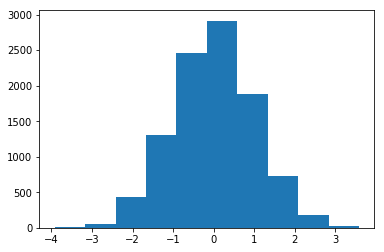

In [39]:
import matplotlib.pyplot as plt

plt.hist(x)

plt.show()

**Note 1:** `random.randn` only accepts integers as inputs, this is a convenience function. The example above uses a simple array to produce a simple example of the data transposed into a histogram. `random.normal` however is capable of performing the same action but with floats and more parameters making it a more functional tool.   

**Note 2:** Python actually has its own random package but this is significantly slower and less functional than `numpy.random`<sup>3</sup>.

As mentioned above, the random package can be used in games where the user must select an option where python has randomly selected the "winner". 

In [55]:
# Python provides a library called random to generate pseudo-random numbers
import random

available_choices = ['Dublin', 'New York', 'Sydney'] #add comment

# Pick a random city from the list.
winning_city = random.choice(available_choices)
winning_city

'Sydney'

It can also be used to test Hypotheses, particularly a "Null" Hypothesis, where the more sceptical assumption is made and then tested to see how likely it is that the person/object/function etc. is doing the thing it is claiming to do. 

For example, the Null Hypothesis could be that from 6 playing cards, 3 red, 3 black, a magician can pick the red cards. In order to test the theory that the magician is just guessing, we can perform the following analysis:

In [94]:
# The six cards.
cards = list(range(6))
cards

[0, 1, 2, 3, 4, 5]

In [103]:
#1 chance divided by the different number of possible outcomes for each card draw i.e. 6 is the first as there are 6 cards to draw from on the first go, then 5 and 4. 
#They are then divigded by the possibilities for the 3 remaining cards not selected i.e. 3, then 2, then only 1. 

1/((6*5*4)/(3*2*1)) #1 in 20 chance or 5% 

0.05

This is confirmed by using the `itertools.combinations` function to list out all the possible combinations of choices the magician could make. It again confirms there is a 1 in 20 chance of getting the only right answer.   

In [104]:
import itertools

poss = list(itertools.combinations(cards, 3))
len(poss)

20

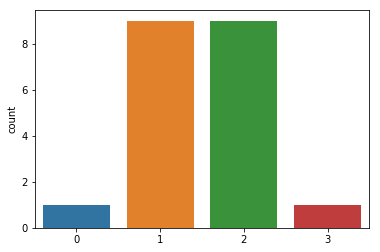

In [105]:
import random
import seaborn as sns

# we then use random.choice to select a correct answer from the list of 20 to simulate the experiment.
red_cards = set(random.choice(poss))

# this function then counts the overlap between the correct answer, and each of the 20 possiblities.
counts = [len(red_cards & set(i)) for i in itertools.combinations(cards, 3)]

# This function then draws a plot so that we may analyse the data visually.
sns.countplot(counts)

We can see that apart from the 5% chance the magician will get the red cards, there is also a 50% chance that the magician will get at least 2 red cards if only randomly guessing the pick.

The above examples show how random data can be used within the Python package.

## PART 2: Use of "Simple Random Data" and "Permutations" Functions

The use of the Simple Random Data versus Permutations Functions is best seen through examples. 

Functions listed as Simple Random Data in Scipy.org<sup>4</sup> include `random.rand` and `random.randn` as demonstrated above, as well as the following:

### randint and random_integers
`random.randint` and `random.random_integers` are similar in that they accept boundry intervals of integers but are half-open interval and closed interval respectively. If no high integer is assigned for `random.randint`, 0 is the lowest value assigned, while for `random.random_integers`, the low parameter becomes the highest such integer and 1. 
Data type (dtype) is also an option for `random.randint`. 

In [121]:
np.random.randint(0, 60, size=17) #request to produce an array of 20 random integers from 0 to 59. Half-open interval includes 0 but not 60.

array([37, 25, 17,  6,  2, 54, 55, 53, 27, 59, 15, 31, 26, 32, 27,  4, 47])

Interestingly, ipython is moving away from `random.random_integers` for the preferable `random.randint`and actively suggests to use it. 

In [122]:
np.random.random_integers(5, size=17) #closed interval includes 1 and 5 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 5 + 1) instead
  """Entry point for launching an IPython kernel.


array([1, 4, 2, 1, 3, 2, 3, 5, 5, 2, 2, 4, 2, 2, 2, 4, 1])

### random_sample, random, ranf, sample

Reviewing these 4 functions they all appear to be producing the same results using a “continuous uniform” distribution. A quick review of the characteristics of the functions show identical results. See table below created from data in Scipy.org<sup>4</sup>.


|**Function** |**Returns** | **Interval** | **Parameters**
|:---|:---|:---|:---
|`random_sample` | float | half-open interval [0.0, 1.0) | size (optional)
|`random` | float | half-open interval [0.0, 1.0) | size (optional)
|`ranf` | float | half-open interval [0.0, 1.0) | size (optional)
|`sample` | float | half-open interval [0.0, 1.0) | size (optional)

After some research, it indeed appears to be correct that they are fundamentally the same and all produce random numbers<sup>5</sup>. Examples are as follows: 

In [120]:
np.random.random_sample((8,2)) #Defaults to a range betweeen 0 and 1.0, not including 0 itself. 

array([[0.0913339 , 0.96010288],
       [0.14873661, 0.24940174],
       [0.56511547, 0.01165562],
       [0.68284772, 0.58122547],
       [0.27787015, 0.67661881],
       [0.92296369, 0.70910359],
       [0.937086  , 0.92660923],
       [0.83163698, 0.48971475]])

In [52]:
a = 3 #Lowest value
b = 10 #Highest value 
x = 3 #Array Size x axis 
y = 4 #Array Size y axis

(b - a) * np.random.random_sample((y, x)) + a 
#Using the established Requests an array of random numbers from 3 (but not including 3 itself) to 10


array([[7.42356409, 8.18257946, 5.57558377],
       [7.82295869, 4.40692045, 5.01238881],
       [9.08431008, 6.94047964, 4.63498464],
       [7.64195255, 7.34071159, 9.43569863]])

### random.choice

We have already seen `random.choice` in action earlier where the game was created to select a city and then Python would choose from the established list, which one is the "winner". Most examples of this function in use are below:

In [82]:
np.random.choice(20, 15) 
# NOTE: this is equivalent to np.random.randint(0,20,15) 
# 15 random integers are selected in the output array between 0 and 20 without including 20

array([18, 14, 16, 11,  0, 15,  8,  8,  0,  2,  8,  7, 12,  2, 11])

This function also allows you to influence the probability of each entry too using a *p* entry to create non-uniform output, for example:

In [83]:
np.random.choice(5, 5, p=[0, 0, 0.4, 0.5, 0.1]) #9 of every 10 selections shoudl result in a 2 or a 3 as each p location corresponds to the array's index position

array([3, 2, 2, 2, 2], dtype=int64)

Using the previous game to choose a city we can now create a preferance for one city over the others.

In [118]:
available_choices = ['Dublin', 'New York', 'Sydney'] #add comment

# Pick a random city from the list.
winning_city = np.random.choice(available_choices, p=[0.1, 0.3, 0.6]) # NOTE: I did need to add np. to use the numpy functionality to influence probability as this is not a feature of the basic python random function 
winning_city

'Sydney'

### Bytes

By inputting the desired length, this function will return random number of bytes, for example:

In [128]:
np.random.bytes(5)

b'\xcb\x0f\xae\xd1\x0b'

### Shuffle and Permutation

Moving onto the two Permutations Functions, the first is shuffle and as you might expect, its function is to shuffle the sequence of information fed into it. for example:

In [145]:
numbers = np.arange(17) #creates list of numbers from 0-16
numbers

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [146]:
np.random.shuffle(numbers) #shuffles their order
numbers

array([16,  3,  5,  1,  2, 13, 11, 12, 15,  7, 10,  8, 14,  9,  0,  4,  6])

When we call `numbers` the second time, the resulting array is the original list except it now has shuffled numbers i.e. the numbers are shuffled *in situ* and this is now `numbers`. 

However, with a `permetation`, although the result looks similar, a new copy of the array is produced containing the shuffled numbers. The original array can still be called as it ramains unchanged. 

In [155]:
x = np.arange(10) #create an array called x containing a range of numbers from 0 to 9
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [153]:
np.random.permutation(x) #create a permutated version of c (a copy of x except now shuffled)

array([9, 2, 4, 1, 7, 5, 3, 0, 6, 8])

In [154]:
x #we can see when we call x again, it is the original array as it has not been changes, only a copy made above

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Summary

In summary, the difference between the "Simple Random Data" and "Permutations" Functions is that Simple Random Data is selecting data randomly from a range of data input into the function, along with potentially size, shape or probability. Permutations however are instead mixing the existing array of data randomly, either within the original array itself (`shuffle`) or by creating a copy of the array (`permutation`).  

## PART 3: Use and Purpose of Five "Distributions" Functions

In this section I will examine the use and purpose of the following 5 "Distributions" Functions<sup>4</sup> :

- `random.normal`
- `random.standard_normal`
- `random.standard_t`
- `random.power`
- `random.laplace`


### random.normal

`random.normal` draws its selection of numbers from the normal (Gaussian) distribution curve A.K.A Bell curve due to its shape. Normal distribution is designed to capture the variation often seen in nature. The percentage of values reduce as you move away from the mean of the curve and are measured along the x axis in units of standard deviation. The percentage for each standard deviation away from the centre is 
- approximately 68% of values are within one standard deviation (σ) away from the mean (x̅), 
- approximately 95% of values are within two standard deviations (σ) away from the mean (x̅),
- approximately 99.7% of values are within three standard deviations (σ) away from the mean (x̅)

  or 95% of the area of a normal distribution is within 1.96 standard deviations (σ) of the mean (x̅)

In [189]:
mu, sigma = 0, 0.1 #takes arguements for the mean and standard deviation
x = np.random.normal(mu, sigma, 8000)
x

array([ 0.09804586,  0.07609019, -0.01222654, ...,  0.03472528,
       -0.0468335 , -0.01676744])

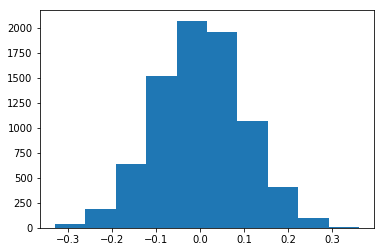

In [185]:
import matplotlib.pyplot as plt

plt.hist(x) #plot the 8000 values on a simple histogram.
plt.show()

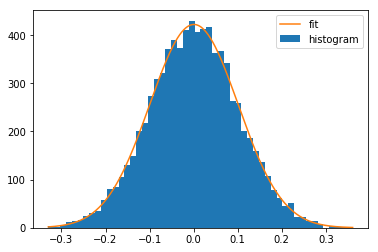

In [186]:
#source to add normal curve to data: https://stackoverflow.com/questions/35544233/fit-a-curve-to-a-histogram-in-python

from scipy.optimize import curve_fit 

def gaussian(x, mean, amplitude, standard_deviation): #define the parameters of a normal distribution curve* 
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

bin_heights, bin_borders, _ = plt.hist(x, bins='auto', label='histogram') #define bin numbers & heights (more bins means better visualisation of curve unlike example above that only has 10 bins)

bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 8000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
plt.legend()


Imagine overlaying the above curve with the textbook Bell Shaped Curve and you can see how they are very close in shape.

![alt text](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg)

### random.standard_normal

The `standard_normal` function is therefore a simplified version of the `normal` function where no mean or standard deviation figures need to be added, only the number of values to be randomly produced.

In [190]:
s = np.random.standard_normal(8000) # is a simplified version of normal and just takes one arguement of size producing similar results
s

array([-0.21019378, -0.33248731, -1.08304806, ...,  0.49594873,
       -2.07788271, -0.56035432])

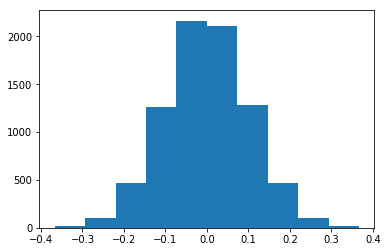

In [192]:
import matplotlib.pyplot as plt

plt.hist(x) #plot the 8000 values on a simple histogram shows the similar outcome when using this function.
plt.show()

### random.standard_t (t-test)

Scipy.org describes the t-test well as "a significance test for the mean value of a normal distribution" <sup>4</sup>. It is a complex but very useful test to compare the mean of populations that meet certain requirements and assumptions<sup>6</sup>. It has a hyperbolic distribution. It requires *degrees of freedom* as an input, and size is optional. An example of the implementation of this test in munpy is below:   

In [194]:
intake = np.array([5260., 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]) #example of women's intake of calories per day in Kj

#recommended value is 7725

## Use of Seeds in Generating Pseudorandom Numbers

4.6 Pseudorandom Number Generation (book)

## References

1. https://docs.scipy.org/doc/numpy/reference/routines.random.html
2. Ian McLoughlan Programming for Data Analysis, GMIT Lectures Week 2 "PyPlot_Examples_Master" 
3. Python for Data Analysis, William McKinney
    2.6 Pseudorandom Number Generation 
4. https://docs.scipy.org/doc/numpy/reference/routines.random.html 
5. https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions
6. https://www.encyclopediaofmath.org/index.php/Student_test

In [2]:
import numpy as np
import random
import seaborn as sns
import itertools
%matplotlib inline

lotto_numbers = list(range(47))
winning_numbers = list(np.random.permutation(48))
y = winning_numbers[0:6]
y

poss = list(itertools.combinations(lotto_numbers, 6))
x = len(poss)
x


10737573

In [ ]:
poss = list(itertools.combinations(lotto_numbers, 6))
x = len(poss)
x

In [108]:

#1 in 10,737,573 chances of getting 6 numbers from a 47 ball draw.

#So if I play the same numbers every Saturday for a year (52 weeks) 
favourite_numbers = [1, 3, 11, 16, 29, 37]
z1 = list(np.random.permutation(poss))
z = z1[0:52]
z

#needs work
if z.count(favourite_numbers) == 1:
    print(Yes)a
    
# Count the overlap between the correct answer, and each of the 70 possiblities.
counts = [len(favourite_numbers & set(z)) for i in poss]
counts
# Creat the plot.
sns.countplot(counts)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()